# Lab 1 - 29/09

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [1]:
import numpy as np
from numpy import random as rd
from matplotlib import pyplot as plt

## Ex 1

In [2]:
def mixGauss(means, sigmas, n):
    """
    Returns two vectors data, labels.
    - data contains 2*n points from two multivariate gaussians X, Y;
    - labels contains the labels (X = 0, Y = 1).
    """
    means = np.array(means)
    sigmas = np.array(sigmas)
    dim = np.shape(means)[1] 
    num_classes = sigmas.size
    
    data = np.full(fill_value= np.inf, shape=(n*num_classes, dim))
    labels = np.zeros(n*num_classes)

    for i, _ in enumerate(sigmas):
        data[i*n:(i+1)*n] = np.random.multivariate_normal(mean=means[i], cov = np.eye(dim)*sigmas[i]**2, size=n)
        labels[i*n:(i+1)*n] = i
    
    return data, labels


def swap_label(p, labels):
    """
    Swaps the labels with probability p.
    """
    n = np.shape(labels)[0]
    noisylabels = np.copy(np.squeeze(labels))
    n_flips = int(np.floor(n*p))
    idx_flip = np.random.choice(n, size = n_flips, replace=False)
    noisylabels[idx_flip] = np.abs(1-noisylabels[idx_flip])
    
    return noisylabels

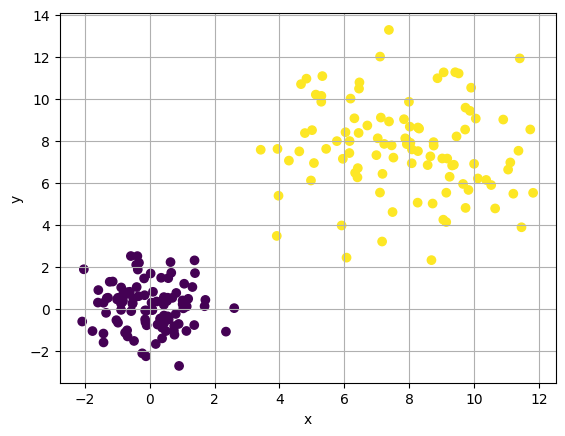

In [3]:
# Mean and variance of two multivariate gaussians X, Y
means = [[0,0], [8,8]]
sigmas = [1, 2]
n = 100

# Visualization of data
data, labels = mixGauss(means, sigmas, n)
plt.scatter(data[:,0], data[:,1], c = labels)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

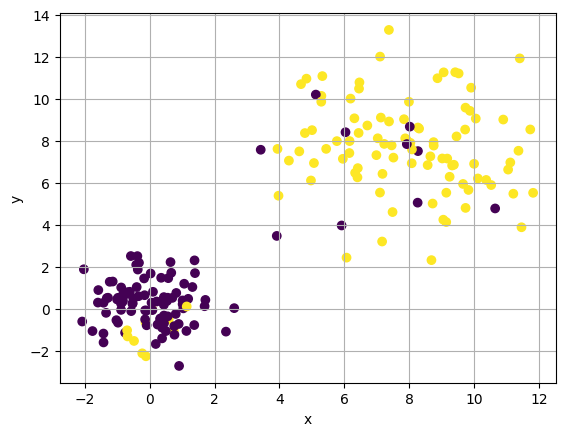

In [4]:
# Visualization of noisy data
noisy_labels = swap_label(0.1, labels)
plt.scatter(data[:,0], data[:,1], c = noisy_labels)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

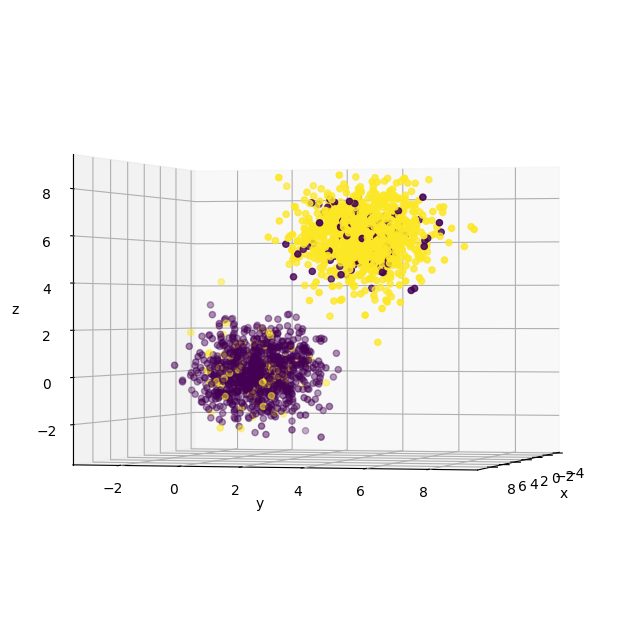

In [5]:
# 3 dimensional case
means = [[0,0,0], [6,5,6]]
sigmas=[1, 1]
n=1000
data, labels = mixGauss(means, sigmas, n)
noisy_labels = swap_label(0.1, labels)

# Visualization of noisy data
plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(data[:,0], data[:,1], data[:,2], c=noisy_labels)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
axes.view_init(0,15)

## Ex 2

In [6]:
def swiss_roll(n):
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
            
    data[:,0]=phi*np.cos(phi)
    data[:,1]=phi*np.sin(phi)
    data[:,2]=psi
    return data

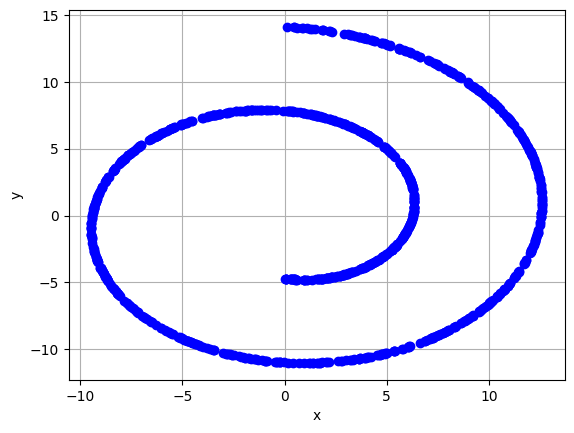

In [7]:
# 2 dimensional case
x = swiss_roll(1000)
plt.plot(x[:,0], x[:,1], "bo")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

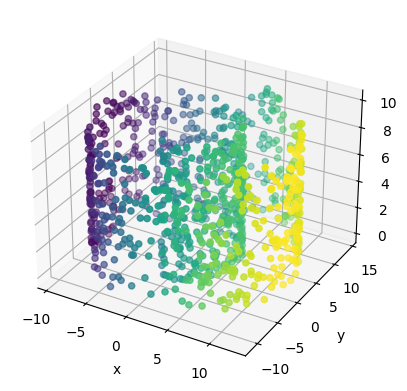

In [8]:
# 3 dimensional case

axes = plt.axes(projection='3d')
axes.scatter3D(x[:,0], x[:,1], x[:,2], c=x[:,0])

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

plt.show()

## Ex 3

In [9]:
def klein(n):
    data = np.zeros((n,3))
    theta = np.random.uniform(low=0, high=np.pi, size=n)
    phi = np.random.uniform(low=0, high=2*np.pi, size=n)
            
    data[:,0]= -2/15*np.cos(theta)*(3*np.cos(phi)+30*np.sin(theta)+90*np.cos(theta)**4*np.sin(theta)-60*np.cos(theta)**6*np.sin(theta)+5*np.cos(theta)*np.cos(phi)*np.sin(theta))
    data[:,1]= 1/15*np.sin(theta)*(3*np.cos(phi)+3*np.cos(theta)**2*np.cos(phi)-48*np.cos(theta)**4*np.cos(phi)+48*np.cos(theta)**6*np.cos(phi)-60*np.sin(theta)
                                   +5*np.cos(theta)*np.cos(phi)*np.sin(theta)-5*np.cos(theta)**3*np.cos(theta)*np.sin(theta)-80*np.cos(theta)**5*np.cos(phi)*np.sin(theta)
                                   +80*np.cos(theta)**7*np.cos(phi)*np.sin(theta))
    data[:,2]=2/15*(3+5*np.cos(theta)*np.sin(theta))*np.sin(phi)
    
    return data

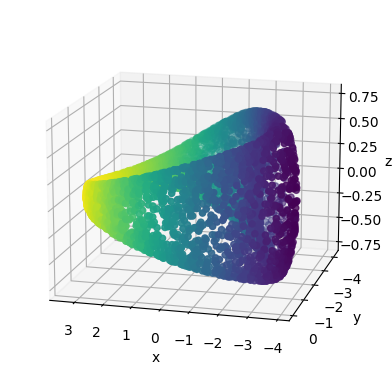

In [10]:
x = klein(5000)

axes = plt.axes(projection='3d')
axes.scatter3D(x[:,0], x[:,1], x[:,2], c=x[:,0])

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')
axes.view_init(15, 105)
plt.show()